# Análise Exploratória dos Microdados do Ensino Superior

por Gabriely da Mata

Este notebook consiste na apresentação de análise exploratória dos microdados do ensino superior do Brasil em 2019, por meio de um jupyter-notebook, microdados retirados do site do Inep, disponível em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-da-educacao-superior

#  Perguntas

- Dos cursos superiores, quais possuem suporte para PcDs?
- Quais os cursos mais procurados?
- Qual o percentual de desistência nos cursos?
- Quais cursos com o maior percentual de desistência?

# Codificação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px

In [2]:
import seaborn as sns

In [59]:
df = pd.read_excel("SUP_CURSO_2019.xlsx")

In [4]:
df.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_LOCAL_OFERTA,CO_UF,CO_MUNICIPIO,IN_CAPITAL,CO_CURSO,NO_CURSO,...,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL,Unnamed: 112,Unnamed: 113,Unnamed: 114
0,2019,1,1,1,105340.0,51.0,5103403.0,1.0,1,DIREITO,...,447.0,75.0,90.0,87,NaN,90.0,2633.0,NaN,NaN,NaN
1,2019,1,1,1,105340.0,51.0,5103403.0,1.0,2,CIÊNCIAS ECONÔMICAS,...,323.0,28.0,115.0,107,NaN,128.0,937.0,NaN,NaN,NaN
2,2019,1,1,1,105340.0,51.0,5103403.0,1.0,3,ENGENHARIA CIVIL,...,248.0,45.0,52.0,52,NaN,55.0,520.0,NaN,NaN,NaN
3,2019,1,1,1,105340.0,51.0,5103403.0,1.0,6,PEDAGOGIA,...,331.0,53.0,98.0,97,NaN,100.0,1422.0,NaN,NaN,NaN
4,2019,1,1,1,105340.0,51.0,5103403.0,1.0,7,SERVIÇO SOCIAL,...,274.0,32.0,97.0,81,NaN,99.0,1239.0,NaN,NaN,NaN


In [5]:
df.columns.values

array(['NU_ANO_CENSO', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
       'TP_ORGANIZACAO_ACADEMICA', 'CO_LOCAL_OFERTA', 'CO_UF',
       'CO_MUNICIPIO', 'IN_CAPITAL', 'CO_CURSO', 'NO_CURSO',
       'TP_SITUACAO', 'CO_CINE_ROTULO', 'TP_GRAU_ACADEMICO',
       'TP_MODALIDADE_ENSINO', 'TP_NIVEL_ACADEMICO', 'IN_GRATUITO',
       'TP_ATRIBUTO_INGRESSO', 'NU_CARGA_HORARIA',
       'DT_INICIO_FUNCIONAMENTO', 'DT_AUTORIZACAO_CURSO',
       'IN_AJUDA_DEFICIENTE', 'IN_MATERIAL_DIGITAL',
       'IN_MATERIAL_AMPLIADO', 'IN_MATERIAL_TATIL',
       'IN_MATERIAL_IMPRESSO', 'IN_MATERIAL_AUDIO', 'IN_MATERIAL_BRAILLE',
       'IN_MATERIAL_LIBRAS', 'IN_DISCIPLINA_LIBRAS', 'IN_TRADUTOR_LIBRAS',
       'IN_GUIA_INTERPRETE', 'IN_RECURSOS_COMUNICACAO',
       'IN_RECURSOS_INFORMATICA', 'IN_INTEGRAL', 'IN_MATUTINO',
       'IN_VESPERTINO', 'IN_NOTURNO', 'NU_INTEGRALIZACAO_INTEGRAL',
       'NU_INTEGRALIZACAO_MATUTINO', 'NU_INTEGRALIZACAO_VESPERTINO',
       'NU_INTEGRALIZACAO_NOTURNO', 'NU_INTEGRALIZACAO_EAD',
 

In [60]:
columnsSup_Curso = ['TP_ORGANIZACAO_ACADEMICA','TP_GRAU_ACADEMICO','NO_CURSO',
       'IN_AJUDA_DEFICIENTE',
       'QT_MATRICULA_TOTAL', 'QT_CONCLUINTE_TOTAL',
       'QT_INGRESSO_TOTAL', 'QT_VAGA_TOTAL',
       'QT_INSCRITO_TOTAL']

In [61]:
df = df.filter(items = columnsSup_Curso)

**Armazenando o dataset com variáveis relevantes para a análise

In [41]:
df.to_csv(r'SUP_CURSO_2019_QTD.csv', index = False)

In [54]:
df = pd.read_csv("SUP_CURSO_2019_QTD.csv")

In [7]:
df.head()

,NO_CURSO,NU_CARGA_HORARIA,IN_AJUDA_DEFICIENTE,IN_POSSUI_LABORATORIO,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
0,DIREITO,3700,1,1.0,447.0,75.0,90.0,87,NaN,90.0,2633.0
1,CIÊNCIAS ECONÔMICAS,3000,0,1.0,323.0,28.0,115.0,107,NaN,128.0,937.0
2,ENGENHARIA CIVIL,3960,0,1.0,248.0,45.0,52.0,52,NaN,55.0,520.0
3,PEDAGOGIA,3545,1,1.0,331.0,53.0,98.0,97,NaN,100.0,1422.0
4,SERVIÇO SOCIAL,3204,1,1.0,274.0,32.0,97.0,81,NaN,99.0,1239.0


!!Limpeza

In [17]:
df.isnull().sum()

NO_CURSO                             0
NU_CARGA_HORARIA                     0
IN_AJUDA_DEFICIENTE                 55
IN_POSSUI_LABORATORIO               43
QT_MATRICULA_TOTAL                  57
QT_CONCLUINTE_TOTAL                  2
QT_INGRESSO_TOTAL                    1
QT_INGRESSO_VAGA_NOVA                0
QT_INGRESSO_PROCESSO_SELETIVO    40652
QT_VAGA_TOTAL                       55
QT_INSCRITO_TOTAL                    1
dtype: int64

In [4]:
df['IN_AJUDA_DEFICIENTE'].value_counts()

1                     37349
0                      3303
17JUN1941:00:00:00        1
2975                      1
Name: IN_AJUDA_DEFICIENTE, dtype: int64

In [6]:
outlier = df[df['IN_AJUDA_DEFICIENTE'] == '17JUN1941:00:00:00'].index

In [7]:
outlier

Int64Index([4586], dtype='int64')

In [13]:
df['NO_CURSO'][4586]

'ARTES VISUAIS'

In [10]:
df[df['NO_CURSO'] == 'ARTES VISUAIS'].index

Int64Index([  196,   298,   414,   453,   470,   563,   854,  1022,  1057,
             1157,
            ...
            35289, 35320, 36612, 38103, 39169, 39537, 39616, 39632, 39646,
            39686],
           dtype='int64', length=159)

**Optou-se por remover esse dado discrepante, por não interferir na análise dos dados.

In [4]:
df.drop(4586, inplace = True)

In [17]:
df['IN_AJUDA_DEFICIENTE'].value_counts()

1       37349
0        3303
2975        1
Name: IN_AJUDA_DEFICIENTE, dtype: int64

In [18]:
outlier2 = df[df['IN_AJUDA_DEFICIENTE'] == '2975'].index

In [19]:
outlier2

Int64Index([13486], dtype='int64')

In [20]:
df['NO_CURSO'][13486]

'LETRAS - PORTUGUÊS'

In [21]:
df[df['NO_CURSO'] == 'LETRAS - PORTUGUÊS'].index

Int64Index([  144,   520,   574,   640,   846,   896,  1264,  1410,  1860,
             1864,
            ...
            33657, 36511, 36546, 36697, 36715, 37697, 39530, 39653, 40684,
            40688],
           dtype='int64', length=147)

In [5]:
df.drop(13486, inplace = True)

In [6]:
dfcount = df['IN_AJUDA_DEFICIENTE'].value_counts()

In [7]:
df_per = pd.DataFrame(dfcount)

In [8]:
df_per

,IN_AJUDA_DEFICIENTE
1,37349
0,3303


**Qual o percentual de vagas para PCDs no ensino superior?

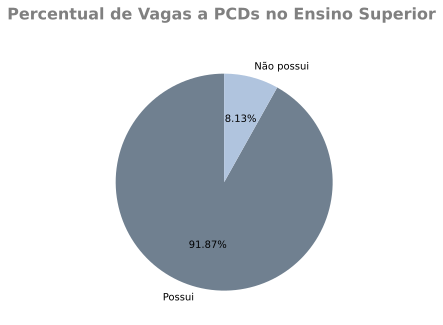

In [11]:
#Plotar grafico
fig, ax = plt.subplots(figsize=(7,5))
labels = ['Possui', 'Não possui']
colors_list = ['slategrey', 'lightsteelblue']
setores = ax.pie(df_per.IN_AJUDA_DEFICIENTE, labels = labels, autopct='%1.2f%%', startangle=90, colors = colors_list)

x_text_antes = -2

# Adicionando um título
plt.text(x=x_text_antes, 
         y=1.5, 
         s='Percentual de Vagas a PCDs no Ensino Superior',
         fontsize=16, 
         color= 'grey',
         weight='bold');
plt.show()

In [ ]:
fig.savefig('per_vagas_pcd_ens_superior.png')

In [371]:
# configurar a visualização
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

In [81]:
df.head()

,NO_CURSO,NU_CARGA_HORARIA,IN_AJUDA_DEFICIENTE,IN_POSSUI_LABORATORIO,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
0,DIREITO,3700,1,1.0,447.0,75.0,90.0,87,NaN,90.0,2633.0
1,CIÊNCIAS ECONÔMICAS,3000,0,1.0,323.0,28.0,115.0,107,NaN,128.0,937.0
2,ENGENHARIA CIVIL,3960,0,1.0,248.0,45.0,52.0,52,NaN,55.0,520.0
3,PEDAGOGIA,3545,1,1.0,331.0,53.0,98.0,97,NaN,100.0,1422.0
4,SERVIÇO SOCIAL,3204,1,1.0,274.0,32.0,97.0,81,NaN,99.0,1239.0


In [ ]:
#df[df['NO_CURSO'] == 'ZOOTECNIA'].QT_INSCRITO_TOTAL.sum()

In [392]:
df_fig2 = df.filter(items = ['NO_CURSO', 'QT_INSCRITO_TOTAL']).groupby('NO_CURSO').QT_INSCRITO_TOTAL.sum()
df_fig2 = pd.DataFrame(df_fig2)

In [417]:
df_fig2[:60]

,QT_INSCRITO_TOTAL
NO_CURSO,
ABI - ARTES CÊNICAS,1148.0
ABI - ARTES PLÁSTICAS,138.0
ABI - ARTES VISUAIS,2388.0
ABI - CICLO BÁSICO COMPOSIÇÃO/REGÊNCIA,86.0
ABI - CICLO BÁSICO MATERIAIS/METALÚRGICA,129.0
ABI - CIÊNCIA DA COMPUTAÇÃO,1797.0
ABI - CIÊNCIAS BIOLÓGICAS,17856.0
ABI - CIÊNCIAS BIOMÉDICAS,481.0
ABI - CIÊNCIAS DA NATUREZA,977.0


In [116]:
df.groupby(df['NO_CURSO']).size()

NO_CURSO
ABI - ARTES CÊNICAS                           4
ABI - ARTES PLÁSTICAS                         1
ABI - ARTES VISUAIS                           5
ABI - CICLO BÁSICO COMPOSIÇÃO/REGÊNCIA        1
ABI - CICLO BÁSICO MATERIAIS/METALÚRGICA      1
                                           ... 
VITICULTURA E ENOLOGIA                        5
WEB DESIGN E PROGRAMAÇÃO                      1
YOGA                                          1
ZOOTECNIA                                   119
ÓPTICA E OPTOMETRIA                           2
Length: 1236, dtype: int64

In [119]:
df_fig2['QT_INSCRITO_TOTAL'].describe()

count    1.236000e+03
mean     1.625203e+04
std      1.042652e+05
min      0.000000e+00
25%      4.200000e+01
50%      3.210000e+02
75%      1.361250e+03
max      2.052256e+06
Name: QT_INSCRITO_TOTAL, dtype: float64

In [141]:
grafico = df_fig2[df_fig2['QT_INSCRITO_TOTAL'] >700000].sort_values(by = 'QT_INSCRITO_TOTAL')

In [180]:
grafico

,QT_INSCRITO_TOTAL
NO_CURSO,
EDUCAÇÃO FÍSICA,844068.0
ENFERMAGEM,1049960.0
MEDICINA,1075264.0
DIREITO,1191460.0
PEDAGOGIA,1465290.0
ADMINISTRAÇÃO,2052256.0


In [14]:
x = np.array(range(1, grafico.shape[0]+1))
x

NameError: name 'grafico' is not defined

**Quais os cursos mais procurados?

In [438]:
#Labels percentual
def set_label_y_in_bar(bar):
    for b in bar:
        height_bar = b.get_height()
        ax.annotate(
                    '{0:.1f}%'.format(100 * height_bar/grafico.QT_INSCRITO_TOTAL.sum()),
                    xy=(b.get_x() + b.get_width(),  height_bar),
                    xytext=(-17, -30),  
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="white",
                    )

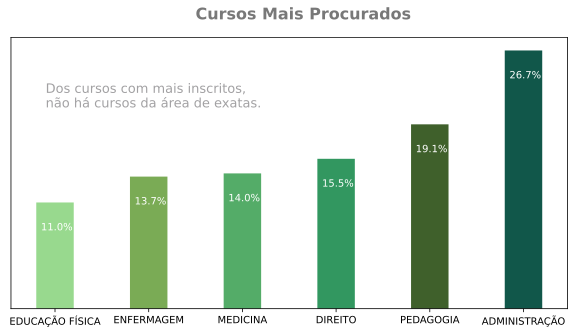

In [440]:
#plotar gráfico
fig2, ax = plt.subplots(figsize=(10, 5))
width_bar = 0.40
color_list = ['#98d98e', '#7aab55' ,'#54ac68', '#329760','#3f602b', '#11574a']
barras = ax.bar(x, grafico.QT_INSCRITO_TOTAL, width_bar, color=color_list )


#Remover Axis
plt.gca().axes.get_yaxis().set_visible(False)

#Labels
labels = ['EDUCAÇÃO FÍSICA','ENFERMAGEM','MEDICINA','DIREITO','PEDAGOGIA','ADMINISTRAÇÃO']
ax.set_xticks(x)
ax.set_xticklabels(labels);

x_text = 0.2
y_text = 1.5
# Título
# plt.title('Cursos mais Procurados')
plt.text(x= 2.5, y = 2300000,s = "Cursos Mais Procurados", fontsize=16, color = '#787878', weight='bold')

plt.text(x= .9, y = 1600000,
         s = "Dos cursos com mais inscritos,\n"
         "não há cursos da área de exatas.", 
         fontsize=13, color = '#A2A1A3')

set_label_y_in_bar(barras)
plt.show()

In [373]:
fig2.savefig('per_mais_inscritos_ens_superior.png')

**Optou-se por filtrar os dados pelos cursos mais populares, pois há mais variância

In [405]:
cursos_exatas = []
arq = open(r"cursos_exatas.txt", "r")
for linha in arq.readlines():
    cursos_exatas.append(linha)
arq.close()
cursos_exatas = pd.Series(cursos_exatas)
cursos_exatas = cursos_exatas.map(lambda x : x.upper())
cursos_exatas = cursos_exatas.map(lambda x : x.replace("\n", ""))

In [406]:
cursos_humanas = []
arq = open(r"cursos_humanas.txt", "r")
for linha in arq.readlines():
    cursos_humanas.append(linha)
arq.close()
cursos_humanas = pd.Series(cursos_humanas)
cursos_humanas = cursos_humanas.map(lambda x : x.upper())
cursos_humanas = cursos_humanas.map(lambda x : x.replace("\n", ""))

In [407]:
cursos_biologicas = []
arq = open(r"cursos_biologicas.txt", "r")
for linha in arq.readlines():
    cursos_biologicas.append(linha)
arq.close()
cursos_biologicas = pd.Series(cursos_biologicas)
cursos_biologicas = cursos_biologicas.map(lambda x : x.upper())
cursos_biologicas = cursos_biologicas.map(lambda x : x.replace("\n", ""))

In [457]:
cursoE = []
totalE = []
areaE = []
for i in cursos_exatas.values:
    if len(df[df['NO_CURSO'] == i].index) >0:
        cursoE.append(i)
        areaE.append("Exatas")
        soma = 0
        for j in df[df['NO_CURSO'] == i].index:
            soma += df['QT_INSCRITO_TOTAL'][j]
        totalE.append(soma) 
dfE = pd.DataFrame(cursoE)
dfE['QT_INSC'] = totalE
dfE['AREA'] = areaE

In [460]:
cursoH = []
totalH = []
areaH = []
for i in cursos_humanas.values:
    if len(df[df['NO_CURSO'] == i].index) >0:
        cursoH.append(i)
        areaH.append("Humanas")
        soma = 0
        for j in df[df['NO_CURSO'] == i].index:
            soma += df['QT_INSCRITO_TOTAL'][j]
        totalH.append(soma)
dfH = pd.DataFrame(cursoH)
dfH['QT_INSC'] = totalH
dfH['AREA'] = areaH
df2 = dfE.append(dfH)

In [464]:
cursoB = []
totalB = []
areaB = []
for i in cursos_biologicas.values:
    if len(df[df['NO_CURSO'] == i].index) >0:
        cursoB.append(i)
        areaB.append("Biológicas")
        soma = 0
        for j in df[df['NO_CURSO'] == i].index:
            soma += df['QT_INSCRITO_TOTAL'][j]
        totalB.append(soma)
dfB = pd.DataFrame(cursoB)
dfB['QT_INSC'] = totalB
dfB['AREA'] = areaB
df_areas = df2.append(dfB)


,0,QT_INSC,AREA
0,ARQUITETURA E URBANISMO,245701.0,Exatas
1,CIÊNCIA DA COMPUTAÇÃO,132824.0,Exatas
2,EDUCAÇÃO DO CAMPO,4625.0,Exatas
3,FÍSICA,78711.0,Exatas
4,GEOLOGIA,7092.0,Exatas
...,...,...,...
33,QUIROPRAXIA,418.0,Biológicas
34,RADIOLOGIA,61984.0,Biológicas
35,TERAPIA OCUPACIONAL,14923.0,Biológicas
36,TOXICOLOGIA AMBIENTAL,193.0,Biológicas


In [468]:
df_areas.rename(columns={0: 'CURSO'}, inplace = True)

In [470]:
df_areas.to_csv(r'CURSOS_AREAS.csv', index = False)

In [2]:
df_areas = pd.read_csv('CURSOS_AREAS.csv')

In [8]:
df_filter = df_areas.filter(['CURSO', 'QT_INSC', 'AREA']).groupby('AREA').QT_INSC.sum()
df_filter = df_filter.sort_values()
df_filter = pd.DataFrame(df_filter)

In [9]:
df_filter

,QT_INSC
AREA,
Exatas,3222084.0
Biológicas,6177561.0
Humanas,7549099.0


In [45]:
def set_per_text(bar):
    for i in bar:
        height_bar = i.get_height()
        ax.annotate(
            '{:.1f}%'.format(100*height_bar/df_filter.QT_INSC.sum()),
            xy=(i.get_x() + i.get_width(),  height_bar),
            xytext=(-30, -30),  
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=16,
            color="white",)

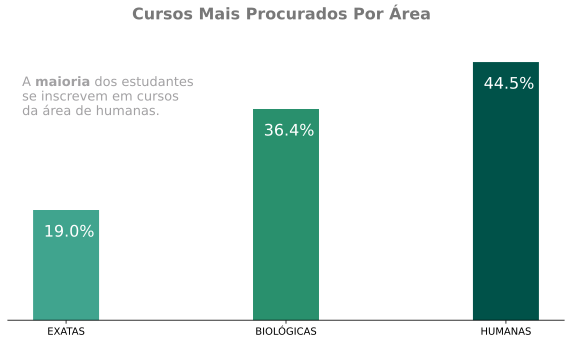

In [52]:
#plotar gráfico
fig3, ax = plt.subplots(figsize=(10,5))

color_list = ['#40a48e', '#29906d', '#005249']

x = np.array(range(1, df_filter.shape[0]+1))
x

#Axes
width_bar = 0.3
barras_areas = ax.bar(x, df_filter.QT_INSC, width_bar, color=color_list)

#Remover axis
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)


#Remover axis y
plt.gca().axes.get_yaxis().set_visible(False)


#Labels
labels = ['EXATAS', 'BIOLÓGICAS', 'HUMANAS']

ax.set_xticks(x)
ax.set_xticklabels(labels);


#Título
plt.text(x= 1.3, y= 8800000, 
         s= 'Cursos Mais Procurados Por Área',
         fontsize = 16,
        color = '#787878',
        weight = 'bold');

#Texto
plt.text(x = .8, y=6000000,
        s="A $\\bf{maioria}$ dos estudantes\n"
         "se inscrevem em cursos\n"
         "da área de humanas.",
        fontsize = 13,
        color = '#A2A1A3')


set_per_text(barras_areas)
plt.show()

In [53]:
fig3.savefig('per_cursos_por_areas.png')

In [51]:
# configurar a visualização
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

In [62]:
df.head()

,TP_ORGANIZACAO_ACADEMICA,TP_GRAU_ACADEMICO,NO_CURSO,IN_AJUDA_DEFICIENTE,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
0,1,1,DIREITO,1,447.0,75.0,90.0,90.0,2633.0
1,1,1,CIÊNCIAS ECONÔMICAS,0,323.0,28.0,115.0,128.0,937.0
2,1,1,ENGENHARIA CIVIL,0,248.0,45.0,52.0,55.0,520.0
3,1,2,PEDAGOGIA,1,331.0,53.0,98.0,100.0,1422.0
4,1,1,SERVIÇO SOCIAL,1,274.0,32.0,97.0,99.0,1239.0


In [71]:
df['TP_ORGANIZACAO_ACADEMICA'] = df.TP_ORGANIZACAO_ACADEMICA.map(lambda x: 'Universidade' if x == 1 else x)
df['TP_ORGANIZACAO_ACADEMICA'] = df.TP_ORGANIZACAO_ACADEMICA.map(lambda x: 'Centro Universitário' if x == 2 else x)
df['TP_ORGANIZACAO_ACADEMICA'] = df.TP_ORGANIZACAO_ACADEMICA.map(lambda x: 'Faculdade' if x == 3 else x)
df['TP_ORGANIZACAO_ACADEMICA'] = df.TP_ORGANIZACAO_ACADEMICA.map(lambda x: 'Instituto Federal de Educação, Ciência e Tecnologia' if x == 4 else x)
df['TP_ORGANIZACAO_ACADEMICA'] = df.TP_ORGANIZACAO_ACADEMICA.map(lambda x: 'Centro Federal de Educação Tecnológica' if x == 5 else x);

In [73]:
df['TP_GRAU_ACADEMICO'] = df.TP_GRAU_ACADEMICO.map(lambda x: 'Bacharelado' if x == 1 else x)
df['TP_GRAU_ACADEMICO'] = df.TP_GRAU_ACADEMICO.map(lambda x: 'Licenciatura' if x == 2 else x)
df['TP_GRAU_ACADEMICO'] = df.TP_GRAU_ACADEMICO.map(lambda x: 'Tecnológico' if x == 3 else x)

In [74]:
df.head()

,TP_ORGANIZACAO_ACADEMICA,TP_GRAU_ACADEMICO,NO_CURSO,IN_AJUDA_DEFICIENTE,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
0,Universidade,Bacharelado,DIREITO,1,447.0,75.0,90.0,90.0,2633.0
1,Universidade,Bacharelado,CIÊNCIAS ECONÔMICAS,0,323.0,28.0,115.0,128.0,937.0
2,Universidade,Bacharelado,ENGENHARIA CIVIL,0,248.0,45.0,52.0,55.0,520.0
3,Universidade,Licenciatura,PEDAGOGIA,1,331.0,53.0,98.0,100.0,1422.0
4,Universidade,Bacharelado,SERVIÇO SOCIAL,1,274.0,32.0,97.0,99.0,1239.0


<AxesSubplot:>

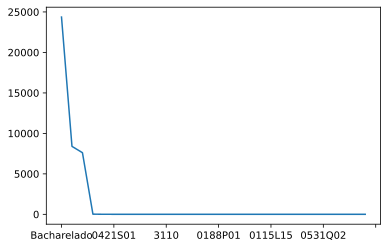

In [77]:
df.TP_GRAU_ACADEMICO.value_counts().plot()

In [87]:
df.TP_GRAU_ACADEMICO.value_counts()

Bacharelado     24371
Tecnológico      8393
Licenciatura     7611
0321R01            20
0114C02             5
0421S01             4
0917P01             2
0288P01             2
0113F01             2
0211C01             1
3110                1
114000000           1
11400               1
 E/OU LATIM         1
71400000            1
0188P01             1
0011A05             1
0115L10             1
0413C01             1
0588P01             1
0115L15             1
0312C01             1
0412G01             1
0212M01             1
0713R01             1
0531Q02             1
0213H01             1
1140000             1
0213A01             1
0115L12             1
Name: TP_GRAU_ACADEMICO, dtype: int64

In [88]:
df[df['TP_GRAU_ACADEMICO'] == '0213A01']

,TP_ORGANIZACAO_ACADEMICA,TP_GRAU_ACADEMICO,NO_CURSO,IN_AJUDA_DEFICIENTE,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
12484,Universidade,0213A01,ARTE: HISTÓRIA,NaN,NaN,34.0,9.0,NaN,35.0


In [78]:
grau= ['Bacharelado'
,'Licenciatura'
,'Tecnológico']

In [90]:
df['TP_GRAU_ACADEMICO'] = df['TP_GRAU_ACADEMICO'].map(lambda x: np.NAN if x not in grau else x)

In [93]:
df['TP_GRAU_ACADEMICO'].dropna(inplace=True)

<AxesSubplot:>

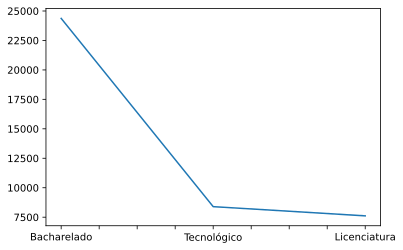

In [96]:
df.TP_GRAU_ACADEMICO.value_counts().plot()

<AxesSubplot:>

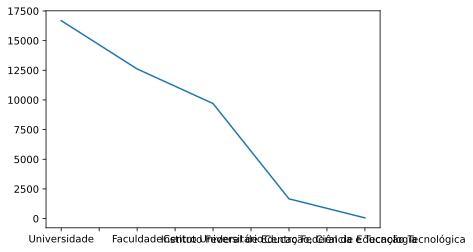

In [98]:
df.TP_ORGANIZACAO_ACADEMICA.value_counts().plot()

In [103]:
df_grau = df.filter(items = ['TP_GRAU_ACADEMICO', 'QT_CONCLUINTE_TOTAL', 'QT_INGRESSO_TOTAL']).groupby('TP_GRAU_ACADEMICO').sum()

In [104]:
df_grau

,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL
TP_GRAU_ACADEMICO,,
Bacharelado,771913.0,2061042.0
Licenciatura,253767.0,731355.0
Tecnológico,223311.0,815041.0


In [197]:
prop = []
for idx, i in enumerate(df_grau.QT_CONCLUINTE_TOTAL.values):
    prop.append(100 * df_grau.QT_CONCLUINTE_TOTAL[idx] / df_grau.QT_INGRESSO_TOTAL[idx])
  
prop = pd.Series(prop)
df_grau['PROPORÇÃO'] = prop

for idx,i in enumerate(prop.values):
    df_grau['PROPORÇÃO'][idx] = i

[37.452560403912194, 34.69819718194311, 27.39874435764581]
0    37.452560
1    34.698197
2    27.398744
dtype: float64


In [199]:
df_grau

,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,PROPORÇÃO
TP_GRAU_ACADEMICO,,,
Bacharelado,771913.0,2061042.0,37.452560
Licenciatura,253767.0,731355.0,34.698197
Tecnológico,223311.0,815041.0,27.398744


In [148]:
def set_label_bar(bar, df_per):
    for b in bar:
        height_bar = b.get_height()
        ax.annotate(
                    '{:.1f}%'.format(100 *height_bar/df_per),
                    xy=(b.get_x() + b.get_width()/2,  height_bar),
                    xytext=(0, -20), 
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="white",)
        

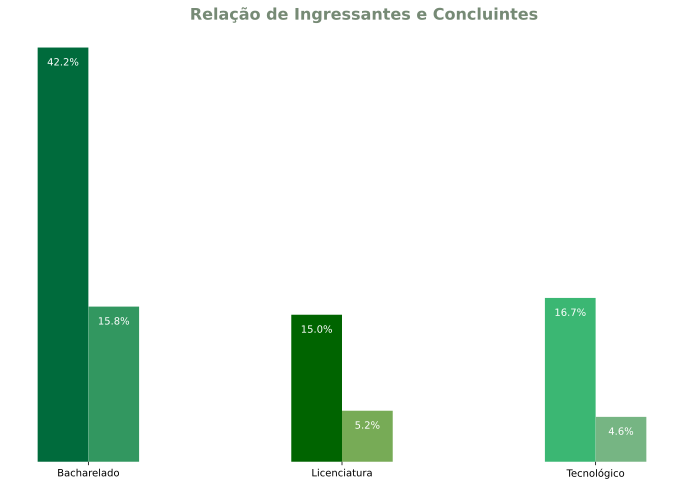

In [168]:
#plotar
fig4, ax = plt.subplots(figsize = (12, 8))

color_list =['#006b3c','#006400', '#3bb773']
color_list1 = ['#329760','#77ab56' ,'#76b583']
x = np.array(range(1, df_grau.QT_CONCLUINTE_TOTAL.shape[0]+1))

#Barras
width_bar = 0.2
barra_ingr = ax.bar(x-width_bar/2, df_grau.QT_INGRESSO_TOTAL, width_bar, color=color_list)
barra_conc = ax.bar(x+width_bar/2, df_grau.QT_CONCLUINTE_TOTAL, width_bar, color=color_list1)

# Remover grids
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# labels do eixo
ax.set_xticks(x)
ax.set_xticklabels(grau);



#Título
plt.text(x=1.4, 
         y=2200000, 
         s='Relação de Ingressantes e Concluintes',
         fontsize=16, 
         color='#768a75',
         weight='bold');


set_label_bar(barra_ingr, (df.QT_INGRESSO_TOTAL + df.QT_CONCLUINTE_TOTAL).sum())
set_label_bar(barra_conc, (df.QT_INGRESSO_TOTAL + df.QT_CONCLUINTE_TOTAL).sum())

In [157]:
# configurar a visualização
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

In [169]:
fig4.savefig('per_evasão_por_grau.png')

In [209]:
def set_label_bar(bar):
    for b in bar:
        height_bar = b.get_height()
        ax.annotate(
                    '{:.1f}%'.format(height_bar),
                    xy=(b.get_x() + b.get_width()/2,  height_bar),
                    xytext=(0, -20), 
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=15,
                    color="white",)

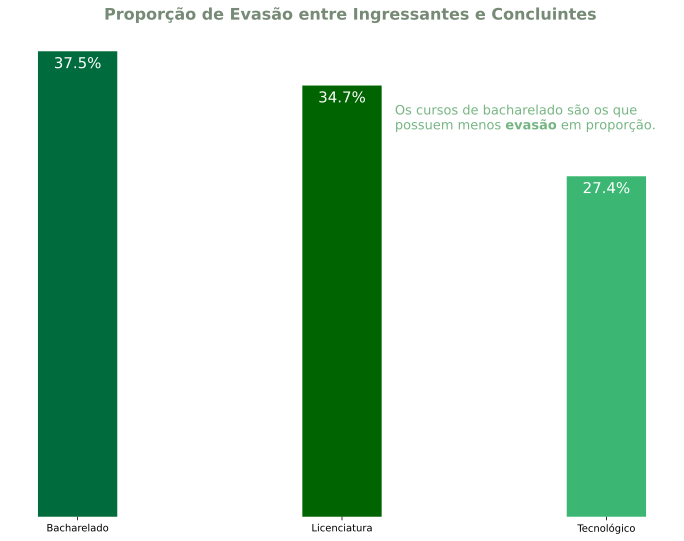

In [230]:
#plotar
fig5, ax = plt.subplots(figsize = (12, 9))

color_list =['#006b3c','#006400', '#3bb773']

x = np.array(range(1, df_grau.PROPORÇÃO.shape[0]+1))

#Barras
width_bar = 0.3
barra_pror = ax.bar(x, df_grau.PROPORÇÃO, width_bar, color=color_list)

# Remover grids
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# Remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# labels do eixo
ax.set_xticks(x)
ax.set_xticklabels(grau);



#Título
plt.text(x=1.1, 
         y=40, 
         s='Proporção de Evasão entre Ingressantes e Concluintes',
         fontsize=16, 
         color='#768a75',
         weight='bold');

#Texto
plt.text(x=2.2, 
         y=30, 
         s="Os cursos de bacharelado são os que \n"
         "possuem menos $\\bf{evasão}$ em proporção.\n",
         fontsize=13, 
         color='#76b583',);


set_label_bar(barra_pror)

In [231]:
fig5.savefig('proporcao_evasao_ens_superior.png')